In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option("display.max_columns", None)


In [9]:
# Adjust path based on where CSV is stored
df = pd.read_csv('../data/expenses_data_multiuser.csv')
print("Shape:", df.shape)
df.head()


Shape: (10000, 8)


,id,user_id,date_time,expense_type,additional_comments,is_active,updated,amount
0,607256,8,2025-10-26 01:46:29,Cafeteria,Monthly rent transfer,True,2025-10-28 01:46:29,1281.63
1,867297,1,2025-09-13 05:17:23,Self,Monthly rent transfer,True,2025-09-15 05:17:23,2161.29
2,873873,2,2025-03-09 03:50:37,Others,Paid for lunch,True,2025-03-10 03:50:37,2198.90
3,815081,3,2025-06-05 00:13:57,Uber/Rapido,Online subscription renewal,True,2025-06-07 00:13:57,3886.20
4,896096,9,2025-04-04 20:15:05,Others,Recharge and utilities,True,2025-04-08 20:15:05,802.61


In [10]:
# Convert dates
df['date_time'] = pd.to_datetime(df['date_time'])
df['updated'] = pd.to_datetime(df['updated'])

# Drop duplicates if any
df = df.drop_duplicates()

# Ensure numeric amount
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df = df.dropna(subset=['amount'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10000 non-null  int64         
 1   user_id              10000 non-null  int64         
 2   date_time            10000 non-null  datetime64[ns]
 3   expense_type         10000 non-null  object        
 4   additional_comments  10000 non-null  object        
 5   is_active            10000 non-null  bool          
 6   updated              10000 non-null  datetime64[ns]
 7   amount               10000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 556.8+ KB
None


In [11]:
# Derive month, year, week
df['month'] = df['date_time'].dt.to_period('M').astype(str)
df['year'] = df['date_time'].dt.year
df['week'] = df['date_time'].dt.isocalendar().week
df['day'] = df['date_time'].dt.day


In [12]:
monthly_summary = (
    df.groupby(['user_id', 'month'])
      .agg(total_expense=('amount', 'sum'),
           avg_expense=('amount', 'mean'),
           transactions=('id', 'count'))
      .reset_index()
)
monthly_summary.head()


,user_id,month,total_expense,avg_expense,transactions
0,1,2025-01,204208.24,2521.089383,81
1,1,2025-02,231844.56,2250.918058,103
2,1,2025-03,281689.16,2657.444906,106
3,1,2025-04,268976.92,2513.802991,107
4,1,2025-05,217020.30,2553.180000,85


In [14]:
# Save processed dataset
monthly_summary.to_csv('../data/processed/monthly_summary.csv', index=False)
print("✅ Saved monthly_summary.csv")


✅ Saved monthly_summary.csv


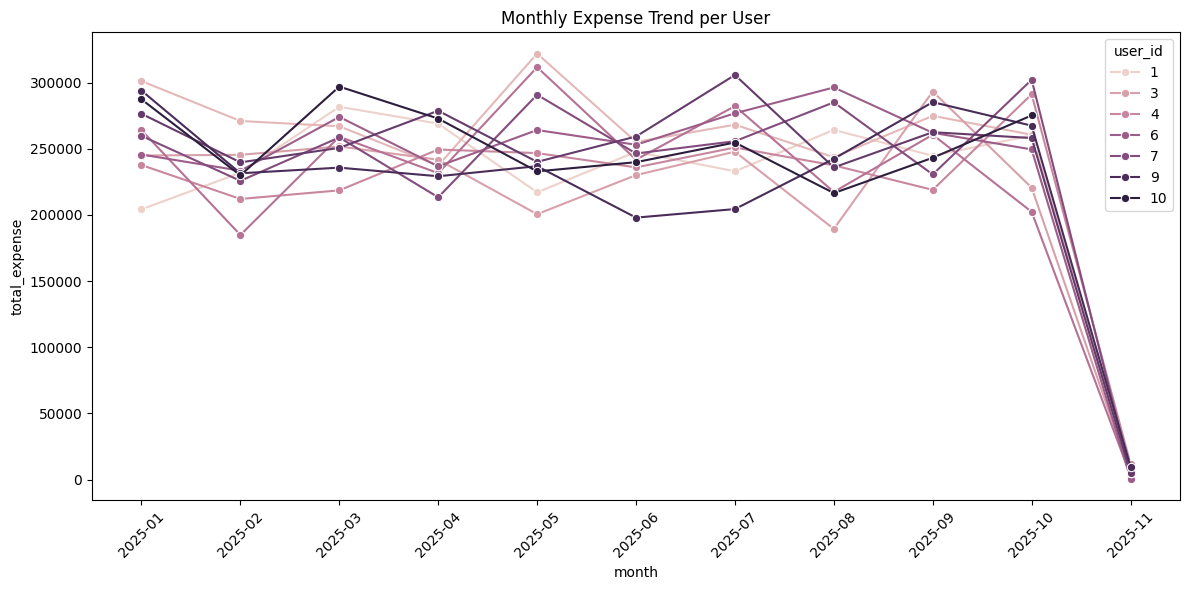

In [15]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_summary,
             x='month', y='total_expense', hue='user_id', marker='o')
plt.title("Monthly Expense Trend per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
print("Unique users:", df['user_id'].nunique())
print("Total months:", df['month'].nunique())
print("\nAverage monthly expense per user:")
print(monthly_summary.groupby('user_id')['total_expense'].mean())


Unique users: 10
Total months: 11

Average monthly expense per user:
user_id
1     223694.584545
2     246013.615455
3     215402.412727
4     219106.156364
5     223464.607273
6     235629.581818
7     233879.198182
8     237431.485455
9     221280.740000
10    254907.218000
Name: total_expense, dtype: float64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Display all columns for clarity
pd.set_option('display.max_columns', None)


In [18]:
# Load multiuser expense dataset
df = pd.read_csv("../data/expenses_data_multiuser.csv")

print("✅ Data Loaded Successfully!")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
df.head()


✅ Data Loaded Successfully!
Rows: 10000, Columns: 8


,id,user_id,date_time,expense_type,additional_comments,is_active,updated,amount
0,607256,8,2025-10-26 01:46:29,Cafeteria,Monthly rent transfer,True,2025-10-28 01:46:29,1281.63
1,867297,1,2025-09-13 05:17:23,Self,Monthly rent transfer,True,2025-09-15 05:17:23,2161.29
2,873873,2,2025-03-09 03:50:37,Others,Paid for lunch,True,2025-03-10 03:50:37,2198.90
3,815081,3,2025-06-05 00:13:57,Uber/Rapido,Online subscription renewal,True,2025-06-07 00:13:57,3886.20
4,896096,9,2025-04-04 20:15:05,Others,Recharge and utilities,True,2025-04-08 20:15:05,802.61


In [24]:
# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Identify date column — adjust based on your CSV
date_cols = [col for col in df.columns if "date" in col or "time" in col]
print("Detected date columns:", date_cols)

# Convert to datetime safely
for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    except Exception as e:
        print(f"❌ Failed to convert {col}: {e}")

# Verify conversion
print(df[date_cols].dtypes)


Missing values per column:
id                     0
user_id                0
date_time              0
expense_type           0
additional_comments    0
is_active              0
updated                0
amount                 0
dtype: int64
Detected date columns: ['date_time', 'updated']
date_time    datetime64[ns]
updated      datetime64[ns]
dtype: object


In [25]:
user_stats = df.groupby('user_id').agg({
    'amount': ['sum', 'mean', 'count']
}).round(2)

user_stats.columns = ['total_spent', 'avg_spent', 'num_transactions']
user_stats = user_stats.reset_index()

print("User-level summary:")
user_stats.head()


User-level summary:


,user_id,total_spent,avg_spent,num_transactions
0,1,2460640.43,2521.15,976
1,2,2706149.77,2627.33,1030
2,3,2369426.54,2422.73,978
3,4,2410167.72,2444.39,986
4,5,2458110.68,2552.56,963


In [27]:
df['month'] = df['date_time'].dt.to_period('M')

monthly_summary = (
    df.groupby(['user_id', 'month'])['amount']
    .sum()
    .reset_index()
    .sort_values(['user_id', 'month'])
)

print("Monthly summary (sample):")
monthly_summary.head()


Monthly summary (sample):


,user_id,month,amount
0,1,2025-01,204208.24
1,1,2025-02,231844.56
2,1,2025-03,281689.16
3,1,2025-04,268976.92
4,1,2025-05,217020.30


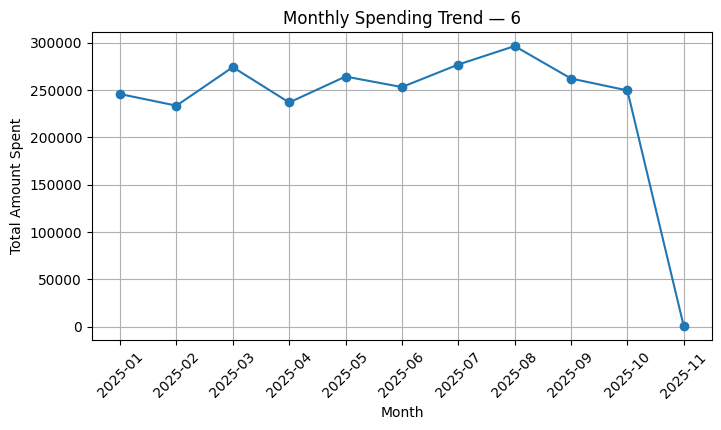

In [31]:
# Example visualization for a single user
sample_user = df['user_id'].unique()[9]
user_data = monthly_summary[monthly_summary['user_id'] == sample_user]

plt.figure(figsize=(8,4))
plt.plot(user_data['month'].astype(str), user_data['amount'], marker='o')
plt.title(f"Monthly Spending Trend — {sample_user}")
plt.xlabel("Month")
plt.ylabel("Total Amount Spent")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
